In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
X = pd.read_csv('iris.csv', header=None, usecols=[0, 1, 2, 3]).values

In [3]:
y = pd.read_csv('iris.csv', header=None, usecols=[4]).values

In [4]:
def initialize_centroids(data, k_centroids):
    '''Randomly picks k elements from data as centroids'''
    
    index = np.random.choice(data.shape[0], k_centroids)
    return data[index]

def find_closest_centroid(data, centroids):
    '''assign each data element the closest centroid from k centroids'''
    
    closest_centroid_index = np.zeros(data.shape[0])

    for ind in range(data.shape[0]):
        closest_centroid_index[ind] = np.argmin(np.sum(np.square(data[ind] - centroids), axis=1))
    
    return closest_centroid_index

def compute_centroids(data, closest_centroid_index, n_centroids):
    new_centroids = np.zeros((n_centroids, data.shape[1]))
    n_neighbours = np.zeros(n_centroids)
    
    for ind in range(data.shape[0]):
        centroid_index = int(closest_centroid_index[ind])
        new_centroids[centroid_index] += data[ind]
        n_neighbours[centroid_index] += 1
        
    for ind in range(n_centroids):
        new_centroids[ind] /= n_neighbours[ind]
        
    return new_centroids

In [5]:
def compute_cost(data, centroids, closest_centroids):
    cost = 0
    for i in range(data.shape[0]):
        cost += np.sum(np.square(data[i] - centroids[int(closest_centroids[i])]))
    return cost

In [6]:
def k_means(data, k_centroids, iterations, n_init):
    min_cost = None
    r_centroids = None
    r_closest_centroid = None
    
    for _ in range(n_init):
        centroids = initialize_centroids(data, k_centroids)
        for i in range(iterations):
            closest_centroid = find_closest_centroid(data, centroids)
            centroids = compute_centroids(data, closest_centroid, k_centroids)
        temp_cost = compute_cost(data, centroids, closest_centroid)
        
        if min_cost:
            if min_cost > temp_cost:
                r_centroids = centroids
                r_closest_centroid = closest_centroid
        else:
            min_cost = temp_cost
            r_centroids = centroids
            r_closest_centroid = closest_centroid
            
    return r_centroids, r_closest_centroid

In [7]:
max_cluster = 5
cost_history = list()
centroid_history = list()
for k in range(1, max_cluster + 1):
    centroids, closest_cent = k_means(X, k, 20, 10)
    centroid_history.append(centroids)
    cost_history.append(compute_cost(X, centroids, closest_cent))

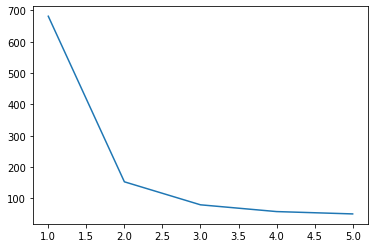

In [8]:
fig = plt.figure()
plt.plot([k for k in range(1, max_cluster + 1)], cost_history, label=['x', 'y'])
plt.xlabel = 'number of clusters'
plt.ylabel = 'cost'
# fig.savefig('k_means.jpg')

In [9]:
centroids, closest_cent = k_means(X, 3, 20, 10)

<ipython-input-4-964e439b716e>:27: RuntimeWarning: invalid value encountered in true_divide
  new_centroids[ind] /= n_neighbours[ind]


In [10]:
from sklearn.datasets import make_moons, make_circles, make_classification

In [11]:
circle_datasest = make_circles(200, shuffle=True, random_state=42)

In [13]:
moon_dataset = make_moons(200, shuffle=True, random_state=42)

In [14]:
type(moon_dataset[0])

numpy.ndarray

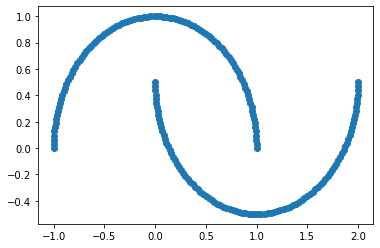

In [15]:
plt.scatter(moon_dataset[0][:, 0], moon_dataset[0][:, 1])

In [17]:
m_cent, m_closest_cent = k_means(moon_dataset[0], 2, 20, 10)

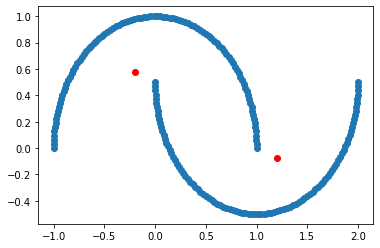

In [18]:
plt.scatter(moon_dataset[0][:, 0], moon_dataset[0][:, 1])
plt.scatter(m_cent[:, 0], m_cent[:, 1], color='r')

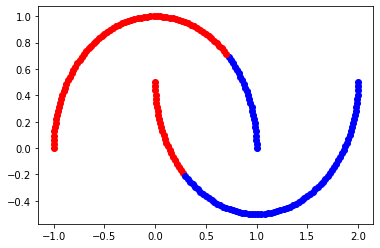

In [39]:
clr = ''
for i in range(200):
    if m_closest_cent[i]:
        clr = 'r'
    else:
        clr = 'b'
    plt.scatter(moon_dataset[0][i, 0], moon_dataset[0][i, 1], color=clr)

Circle

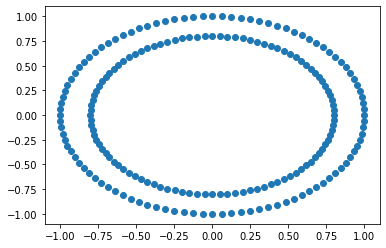

In [40]:
plt.scatter(circle_datasest[0][:, 0], circle_datasest[0][:, 1])

In [42]:
c_cent, c_closest_cent = k_means(circle_datasest[0], 2, 20, 10)

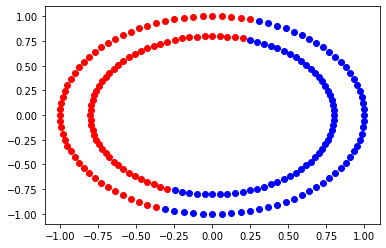

In [43]:
clr = ''
for i in range(200):
    if c_closest_cent[i]:
        clr = 'r'
    else:
        clr = 'b'
    plt.scatter(circle_datasest[0][i, 0], circle_datasest[0][i, 1], color=clr)